In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [25]:
## 9138678373
## https://stackoverflow.com/questions/26248654/how-to-return-0-with-divide-by-zero aporte con 50 puntos

def div_by_zero (numerator,denominator):

    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.true_divide(numerator,denominator)
        c[c == np.inf] = 0
        c = np.nan_to_num(c)
    
    return c

In [26]:
def coor_cro(path):

    B, G, R = cv.split(cv.imread(path))

    B = B.astype(np.uint32)
    G = G.astype(np.uint32)
    R = R.astype(np.uint32)

    denominator_ = (B+R+G)
    denominator = np.reshape(denominator_, np.shape(B)[0]*np.shape(B)[1])


    B_ = np.reshape(B, np.shape(B)[0]*np.shape(B)[1])
    G_ = np.reshape(G, np.shape(B)[0]*np.shape(B)[1])
    R_ = np.reshape(R, np.shape(B)[0]*np.shape(B)[1])


    B_cc = np.reshape(div_by_zero(B_,denominator) , (np.shape(B)[0],np.shape(B)[1]))
    G_cc = np.reshape(div_by_zero(G_,denominator) , (np.shape(B)[0],np.shape(B)[1]))
    R_cc = np.reshape(div_by_zero(R_,denominator) , (np.shape(B)[0],np.shape(B)[1]))

    merged = cv.merge([B_cc*255, G_cc*255, R_cc*255])
    
    file_ = "coor_"+path
    cv.imwrite(file_, merged)
    plt.imshow(merged.astype('uint8'))

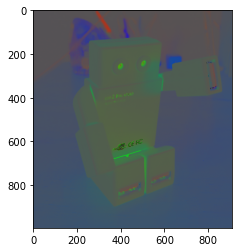

In [27]:
coor_cro('CoordCrom_1.png')

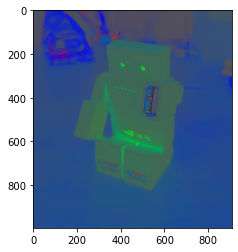

In [28]:
coor_cro('CoordCrom_2.png')

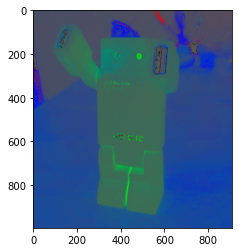

In [29]:
coor_cro('CoordCrom_3.png')

# Las fallas antes presentadas en slack fue por trabajar en formato uint8, que solo era de 0 a 255, por lo que al realizar el split de la imagen en sus canas debí conventirla en uint32 ya que si operaba los canales entre ellos obtendría valores entre 0 y 255.